In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\AYLIN\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Assuming you have data organized in train and test directories for different classes of chest diseases
train_data_dir = r'C:\Users\AYLIN\OneDrive\Desktop\PF\PF\Chest\Train'
test_data_dir = r'C:\Users\AYLIN\OneDrive\Desktop\PF\PF\Chest\Test'

In [3]:
# Define image dimensions and other parameters
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
epochs = 10
batch_size = 32
num_classes = 2

In [4]:
# Creating data generators for train and test sets
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=False)

Found 5216 images belonging to 2 classes.
Found 696 images belonging to 2 classes.


In [5]:

# Creating the CNN model with additional layers
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Add more dense layers for deeper network
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer with softmax activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/10
163/163 [==============================] - 104s 633ms/step - loss: 0.3741 - accuracy: 0.8397 - val_loss: 0.9366 - val_accuracy: 0.7262
Epoch 2/10
163/163 [==============================] - 101s 617ms/step - loss: 0.1490 - accuracy: 0.9486 - val_loss: 1.0527 - val_accuracy: 0.7634
Epoch 3/10
163/163 [==============================] - 101s 621ms/step - loss: 0.0935 - accuracy: 0.9663 - val_loss: 1.3837 - val_accuracy: 0.7307
Epoch 4/10
163/163 [==============================] - 101s 617ms/step - loss: 0.0752 - accuracy: 0.9714 - val_loss: 1.1046 - val_accuracy: 0.7426
Epoch 5/10
163/163 [==============================] - 104s 639ms/step - loss: 0.0709 - accuracy: 0.9737 - val_loss: 2.0440 - val_accuracy: 0.7545
Epoch 6/10
163/163 [==============================] - 102s 628ms/step - loss: 0.0730 - accuracy: 0.9739 - val_loss: 0.9643 - val_accuracy: 0.7649
Epoch 7/10
163/163 [==============================] - 100s 615ms/step - loss: 0.0511 - accuracy: 0.9820 - val_loss: 1.4175 -

In [7]:
# Evaluating the model
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

22/22 [==============================] - 5s 217ms/step


In [8]:
# Calculating confusion matrix, accuracy, F1 score, precision, and recall
conf_matrix = confusion_matrix(true_classes, predicted_classes)
accuracy = accuracy_score(true_classes, predicted_classes)
f1score = f1_score(true_classes, predicted_classes, average='weighted')
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("F1 Score:", f1score)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
[[ 95 171]
 [  7 423]]

Accuracy: 0.7442528735632183
F1 Score: 0.7077454924881309
Precision: 0.7959155449013462
Recall: 0.7442528735632183


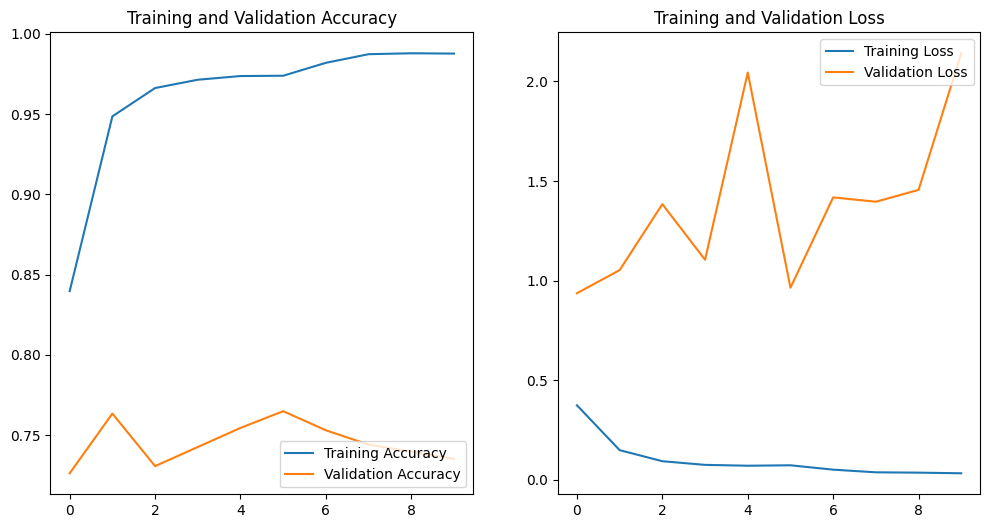

In [9]:

# Plotting accuracy and loss graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()